In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

In [4]:
# Cargar el conjunto de datos
data_path = r'C:\Users\Diego\OneDrive\Escritorio\DatosEvaluacion\samsung.csv'
samsungData = pd.read_csv(data_path)

In [5]:
samsungData

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700
...,...,...,...
2845,24/06/2019,45500,6085066
2846,25/06/2019,45600,7076774
2847,26/06/2019,45700,9226097
2848,27/06/2019,46500,12603534


In [6]:
# Seleccionar las características para el análisis de agrupación
features = ['Close', 'Volume']
data = samsungData[features]

In [7]:
# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

C:\Users\Diego\Documents\phyton\uteq\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Diego\Documents\phyton\uteq\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Diego\Documents\phyton\uteq\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Diego\Documents\phyton\uteq\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

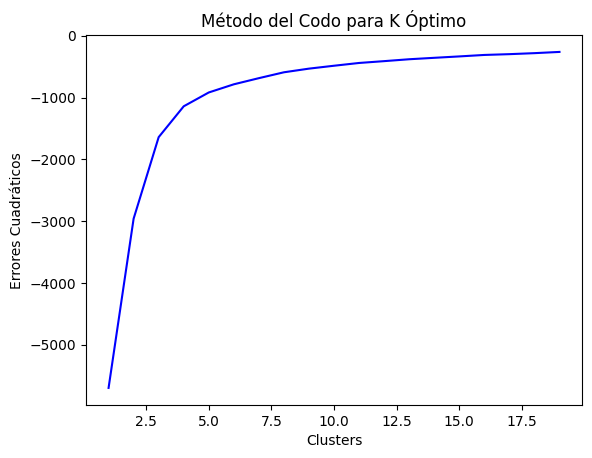

In [14]:
# Determinar el número óptimo de clusters usando el método del Codo
N = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in N]
score = [kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))]

# Graficar la curva del Codo
plt.xlabel('Clusters')
plt.ylabel('Errores Cuadráticos')
plt.title('Método del Codo para K Óptimo')
plt.plot(N, score, color='blue')
plt.show()

In [15]:
# Elegir el número de clusters (K)
num_clusters = 10

In [23]:
#Predicción de clusteres
labels = kmeans.predict(scaled_data)
samsungData['label'] = labels
samsungData

,Date,Close,Volume,cluster,label
0,02/01/2008,10880,18047200,3,3
1,03/01/2008,10920,19346500,3,3
2,04/01/2008,10780,17997350,3,3
3,07/01/2008,10380,39787200,4,4
4,08/01/2008,10320,24783700,3,3
...,...,...,...,...,...
2845,24/06/2019,45500,6085066,2,2
2846,25/06/2019,45600,7076774,2,2
2847,26/06/2019,45700,9226097,2,2
2848,27/06/2019,46500,12603534,2,2


In [24]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [25]:
# Agregar las etiquetas de los clusters al DataFrame
samsungData['cluster'] = kmeans.labels_

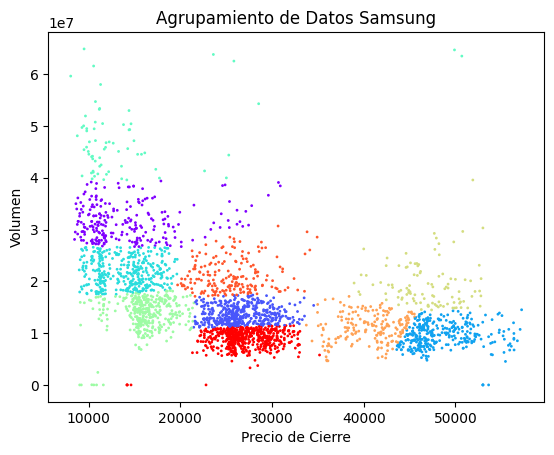

In [35]:
# Visualizar los clusteres
plt.scatter(samsungData['Close'], samsungData['Volume'], c=samsungData['cluster'], cmap='rainbow', s=1)
plt.xlabel('Precio de Cierre')
plt.ylabel('Volumen')
plt.title('Agrupamiento de Datos Samsung')
plt.show()